In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import calendar
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Name of the CSV file
file = '../Mano/updated_Final_Covid_Data.csv'

In [4]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly Cases,Monthly Deaths,Monthly Positive,Monthly Negatives,Monthly Vaccine Initiated,Monthly Vaccine Completed,Monthly Additional Dose
0,1,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,2,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,3,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,4,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,5,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0


In [5]:
df=df.drop(columns='Unnamed: 0')
df.head()

,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly Cases,Monthly Deaths,Monthly Positive,Monthly Negatives,Monthly Vaccine Initiated,Monthly Vaccine Completed,Monthly Additional Dose
0,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0


In [6]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly_Cases,Monthly_Deaths,Monthly_Positive,Monthly_Negatives,Monthly_Vaccine_Initiated,Monthly_Vaccine_Completed,Monthly_Additional_Dose
0,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0


In [10]:
overall_case=df["Monthly_Cases"].sum()
overall_case

34467187.0

In [11]:
overall_death=df["Monthly_Deaths"].sum()
overall_death

478072.0

In [12]:
overall_1vaccine=df["Monthly_Vaccine_Initiated"].sum()
overall_1vaccine

229098622.0

In [13]:
overall_2vaccine=df["Monthly_Vaccine_Completed"].sum()
overall_2vaccine

195091307.0

In [14]:
overall_booster=df["Monthly_Additional_Dose"].sum()
overall_booster

67635932.0

In [16]:
overall_pops=df["Population"].sum()
overall_pops

4021887948.0

In [49]:
#splitting year and month column based on delimiter
month=df['Year-Month'].str.split('-', expand=True)
month.columns=['Year', 'Month']
month_num=month['Month']
month_num

0       1
1       2
2       3
3       4
4       5
       ..
631     8
632     9
633    10
634    11
635    12
Name: Month, Length: 636, dtype: object

In [50]:
month_df=pd.DataFrame({'Month':month_num})
month_df.head()

,Month
0,1
1,2
2,3
3,4
4,5


In [51]:
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
month_df['Month'] = pd.to_datetime(month_df['Month'], format='%m').dt.month_name().str.slice(stop=3)

month_df.head()

,Month
0,Jan
1,Feb
2,Mar
3,Apr
4,May


In [52]:
monthly_total=df['Monthly_Cases']
monthly_total
month_name=month_df['Month']
month_name
state_name=df['State']
state_name
monthly_deaths=df['Monthly_Deaths']
monthly_deaths

0       55.0
1       26.0
2       20.0
3       31.0
4       22.0
       ...  
631     82.0
632    138.0
633    178.0
634    254.0
635     98.0
Name: Monthly_Deaths, Length: 636, dtype: float64

In [53]:
mortality_rate =df['Monthly_Deaths']/df['Population']* 100000
mortality_rate

0       7.506759
1       3.548650
2       2.729731
3       4.231083
4       3.002704
         ...    
631    14.167169
632    23.842309
633    30.753123
634    43.883670
635    16.931495
Length: 636, dtype: float64

In [54]:
compare_df=pd.DataFrame({'Month': month_name,
                        'State': state_name,
                        'Monthly_cases': monthly_total,
                         'Monthly_Deaths': monthly_deaths,
                        'Mortality_rate': mortality_rate})
compare_df

,Month,State,Monthly_cases,Monthly_Deaths,Mortality_rate
0,Jan,AK,7245.0,55.0,7.506759
1,Feb,AK,3861.0,26.0,3.548650
2,Mar,AK,4713.0,20.0,2.729731
3,Apr,AK,5039.0,31.0,4.231083
4,May,AK,2029.0,22.0,3.002704
...,...,...,...,...,...
631,Aug,WY,10009.0,82.0,14.167169
632,Sep,WY,15466.0,138.0,23.842309
633,Oct,WY,12324.0,178.0,30.753123
634,Nov,WY,8163.0,254.0,43.883670


In [55]:
compare_df_5=compare_df.head(120)
compare_df_5.head()

,Month,State,Monthly_cases,Monthly_Deaths,Mortality_rate
0,Jan,AK,7245.0,55.0,7.506759
1,Feb,AK,3861.0,26.0,3.548650
2,Mar,AK,4713.0,20.0,2.729731
3,Apr,AK,5039.0,31.0,4.231083
4,May,AK,2029.0,22.0,3.002704


In [56]:
#compare_df_15 = compare_df.loc[['CA','TX','FL','NY', 'PA'], 'State']

In [57]:
compare_df_5.set_index("Month", inplace=True)

<IPython.core.display.Javascript object>


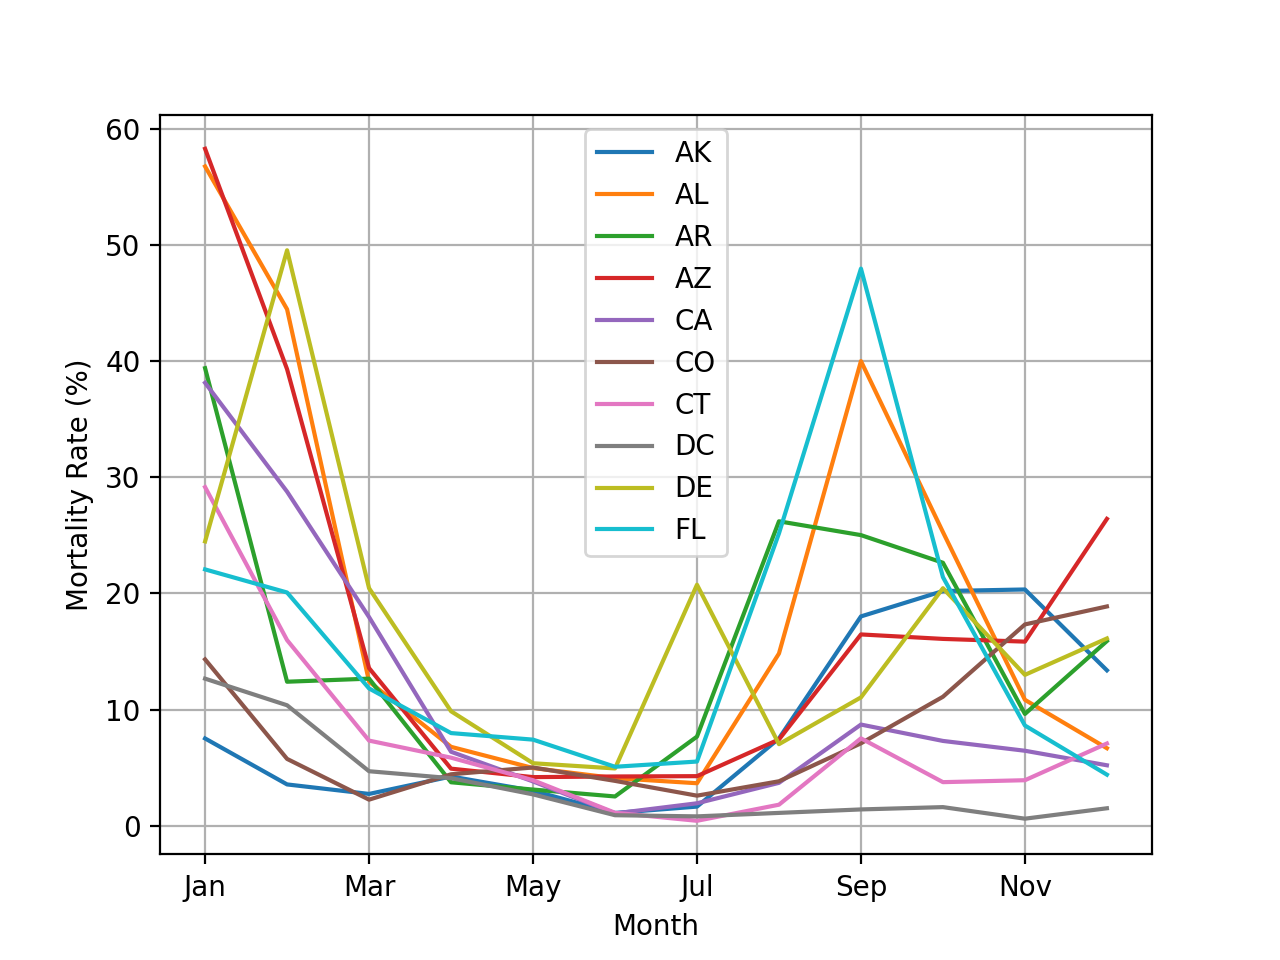

In [58]:
compare_df_5.groupby("State")["Mortality_rate"].plot(ylabel='Mortality Rate (%)', legend=True,grid=True)
#plt.savefig('Images/Mortality_Rate_month_state.png')
plt.show()

In [59]:
state_deaths=df.groupby(['State']).agg({"Monthly_Deaths": "sum", "Population": "sum"})
state_deaths.head()

,Monthly_Deaths,Population
State,,
AK,756.0,8792076.0
AL,11628.0,60478524.0
AR,5472.0,36310692.0
AZ,15350.0,87315792.0
CA,50744.0,470854032.0


In [60]:
high_deaths = state_deaths[state_deaths.Monthly_Deaths >= 10000]
high_deaths

state_deaths=high_deaths.reset_index()
state_deaths.head()

,State,Monthly_Deaths,Population
0,AL,11628.0,60478524.0
1,AZ,15350.0,87315792.0
2,CA,50744.0,470854032.0
3,FL,40832.0,261373536.0
4,GA,19695.0,129594792.0


In [61]:
highest_dead=state_deaths.sort_values('Monthly_Deaths', ascending=False)
highest_dead

,State,Monthly_Deaths,Population
2,CA,50744.0,470854032.0
14,TX,47907.0,354335292.0
3,FL,40832.0,261373536.0
10,NY,21436.0,238030956.0
12,PA,20685.0,155568672.0
11,OH,20485.0,141360204.0
4,GA,19695.0,129594792.0
7,MI,15974.0,120609732.0
1,AZ,15350.0,87315792.0
13,TN,13794.0,83702616.0


In [62]:
mort_rate=highest_dead['Monthly_Deaths']/highest_dead['Population']* 100000
mort_rate

2     10.777013
14    13.520245
3     15.622087
10     9.005551
12    13.296379
11    14.491349
4     15.197370
7     13.244371
1     17.579867
13    16.479772
5      8.574381
9      9.971256
0     19.226660
6     13.191821
15    10.177684
8     13.964125
dtype: float64

In [63]:
new_high_dead=highest_dead.assign(Mortality_rate = mort_rate)
new_high_dead

,State,Monthly_Deaths,Population,Mortality_rate
2,CA,50744.0,470854032.0,10.777013
14,TX,47907.0,354335292.0,13.520245
3,FL,40832.0,261373536.0,15.622087
10,NY,21436.0,238030956.0,9.005551
12,PA,20685.0,155568672.0,13.296379
11,OH,20485.0,141360204.0,14.491349
4,GA,19695.0,129594792.0,15.197370
7,MI,15974.0,120609732.0,13.244371
1,AZ,15350.0,87315792.0,17.579867
13,TN,13794.0,83702616.0,16.479772


<IPython.core.display.Javascript object>


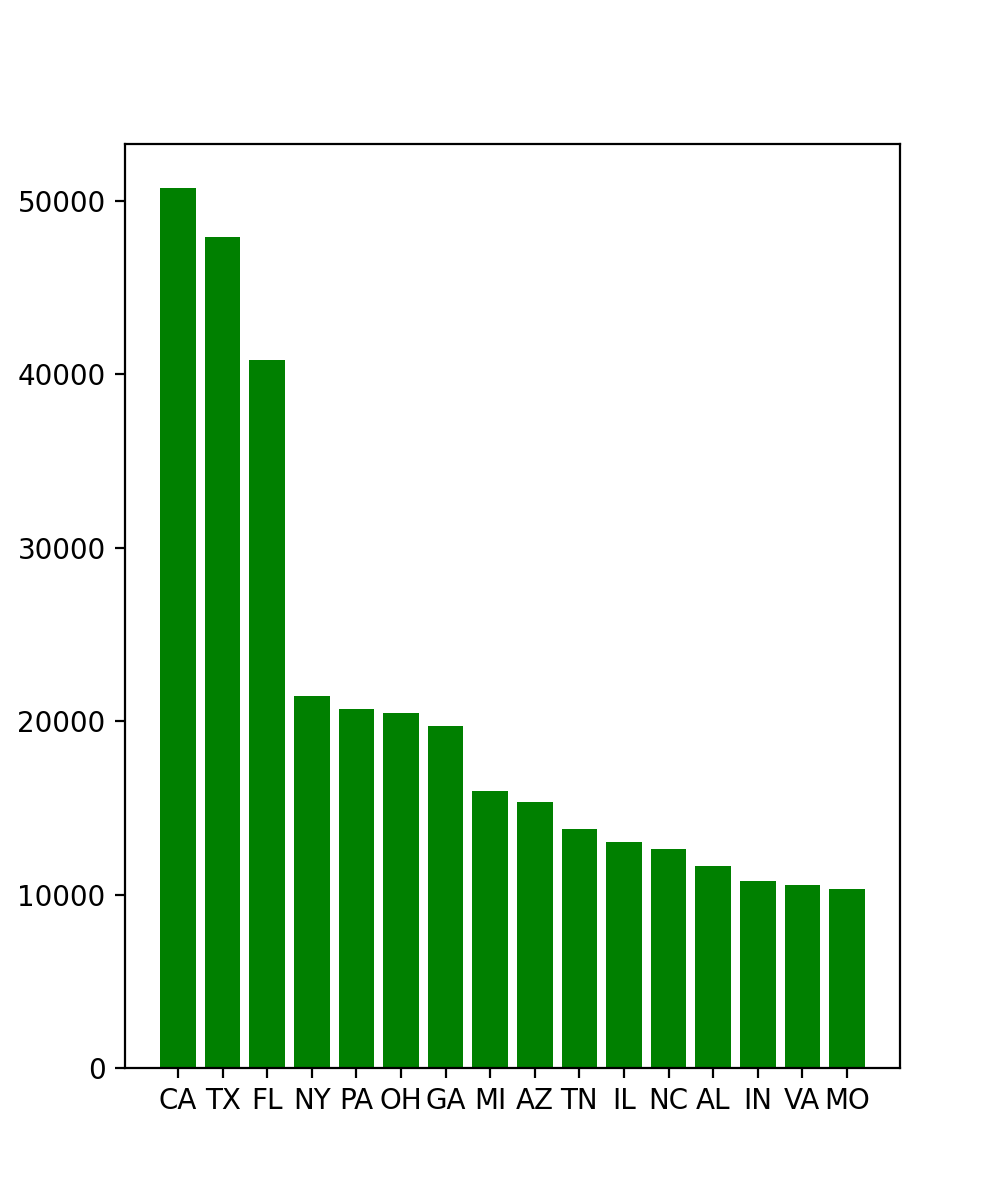

In [64]:
#new_high_dead.groupby("State")["Mortality_rate"].plot(legend=True,grid=True)
plt.figure(figsize=(5, 6))
plt.bar(new_high_dead['State'], new_high_dead['Monthly_Deaths'], color='g')

#plt.savefig("Images/States with highest deaths.png")
plt.show()


<IPython.core.display.Javascript object>


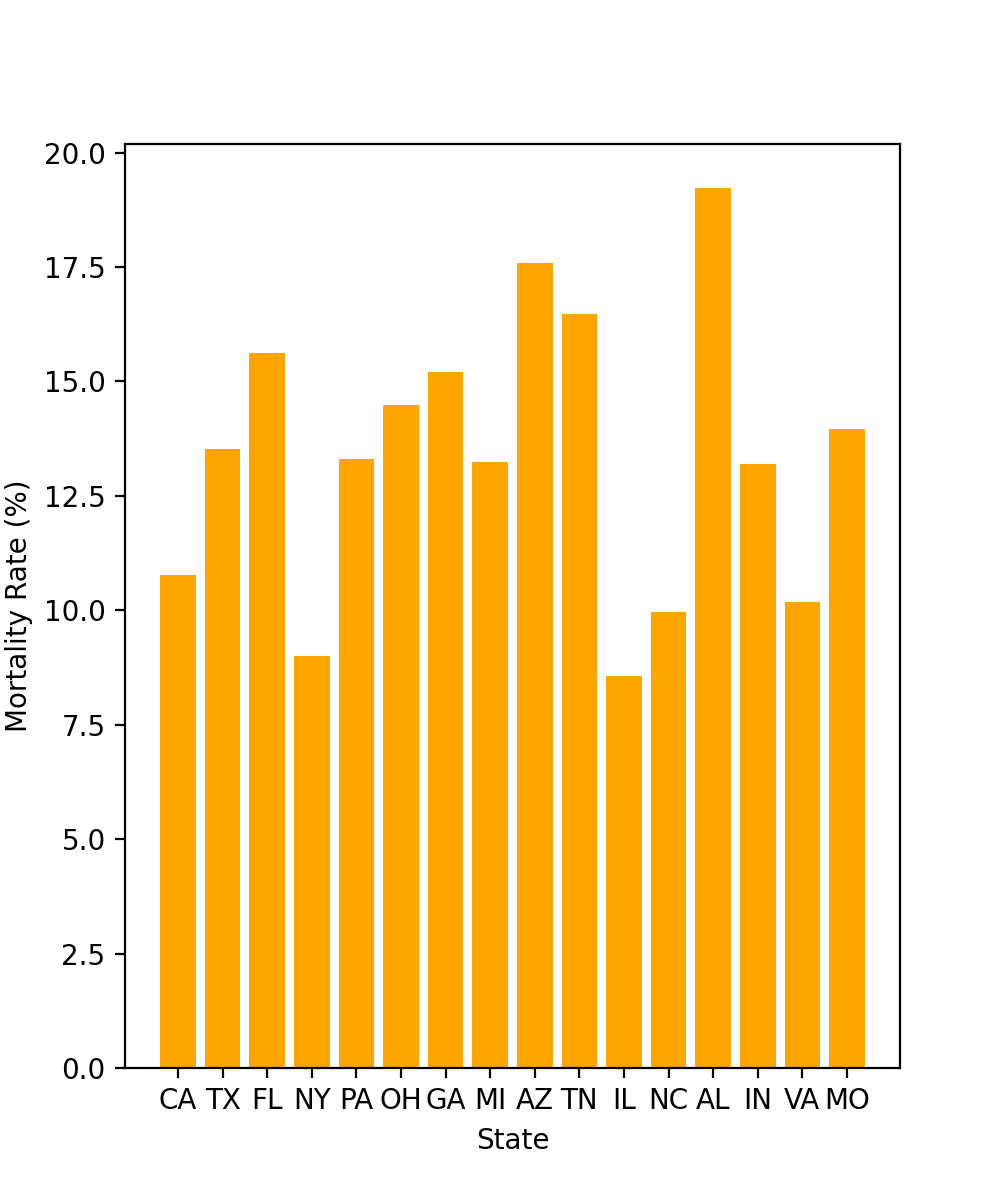

In [65]:
plt.figure(figsize=(5, 6))
plt.bar(new_high_dead['State'], new_high_dead['Mortality_rate'], color='orange')
plt.xlabel("State")
plt.ylabel("Mortality Rate (%)")

#plt.savefig("Images/high_dead vs mortality_rate.png")
plt.show()

<IPython.core.display.Javascript object>


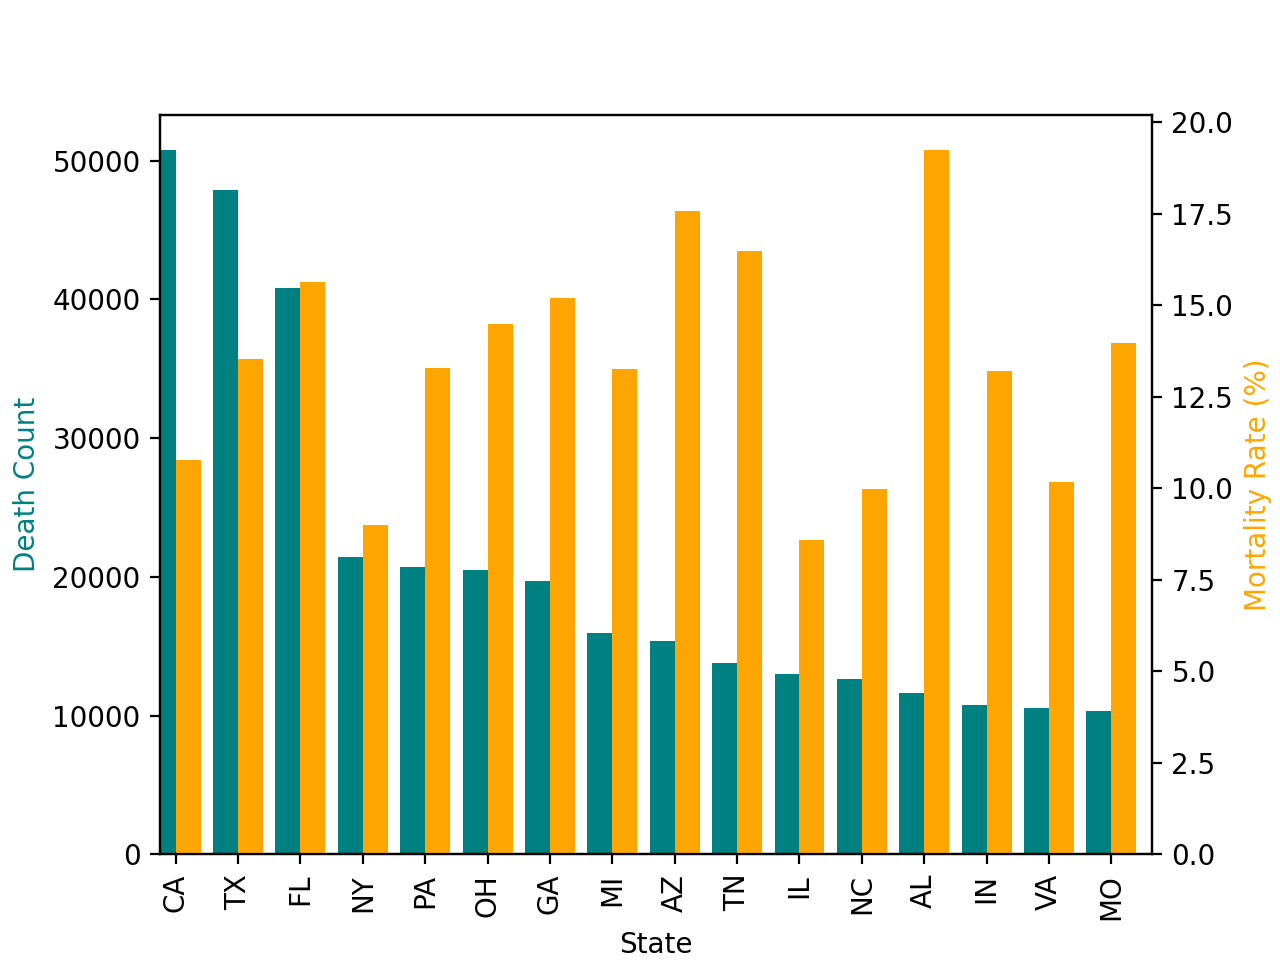

In [66]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
color = 'teal'
ax1.set_xlabel('State')
ax1.set_ylabel('Death Count', color=color)
color = 'orange'
ax2.set_ylabel('Mortality Rate (%)', color=color)


width=0.4

new_high_dead=new_high_dead.set_index('State')


new_high_dead['Monthly_Deaths'].plot(kind='bar',color='teal',ax=ax1,width=width,position=1)

new_high_dead['Mortality_rate'].plot(kind='bar',color='orange',ax=ax2,width=width,position=0)

plt.savefig("Images/combined_bar.png")
plt.show()

In [67]:
month_casecount=compare_df.groupby('Month').agg({"Monthly_cases": "sum"})
ordered= ['Jan','Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
df2=month_casecount.reindex(ordered)
df2

,Monthly_cases
Month,
Jan,6174618.0
Feb,2393887.0
Mar,1844959.0
Apr,1876030.0
May,910671.0
Jun,358245.0
Jul,1372470.0
Aug,4273798.0
Sep,4100154.0


In [68]:
month_deathcount=compare_df.groupby('Month').agg({"Monthly_Deaths": "sum"})
ordered= ['Jan','Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
death_df=month_deathcount.reindex(ordered)
death_df

,Monthly_Deaths
Month,
Jan,95241.0
Feb,71677.0
Mar,38675.0
Apr,23976.0
May,18681.0
Jun,10121.0
Jul,8464.0
Aug,27576.0
Sep,57552.0


<IPython.core.display.Javascript object>


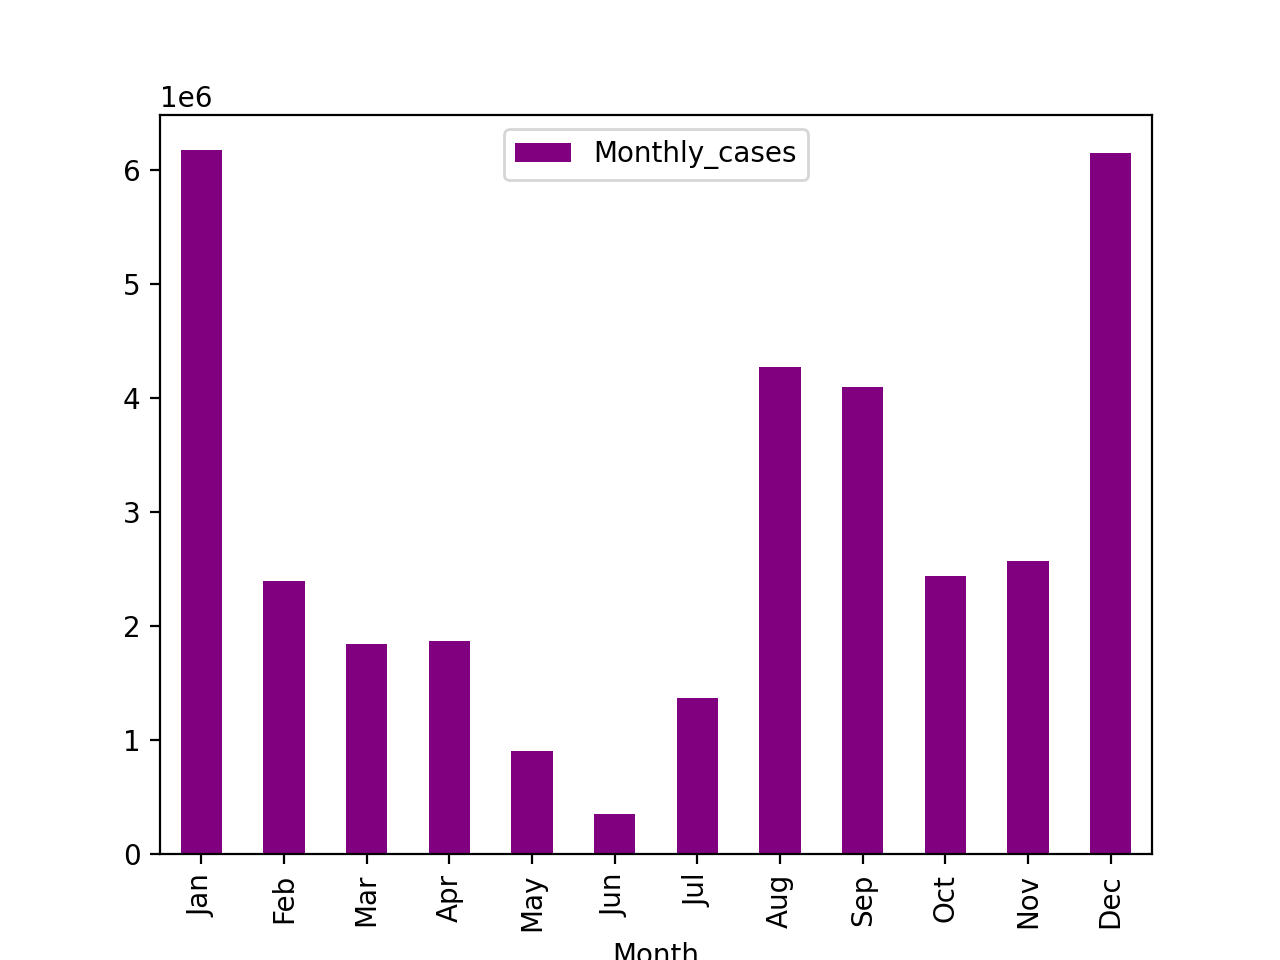

<AxesSubplot:xlabel='Month'>

In [69]:
df2.plot.bar(color='purple')

<IPython.core.display.Javascript object>


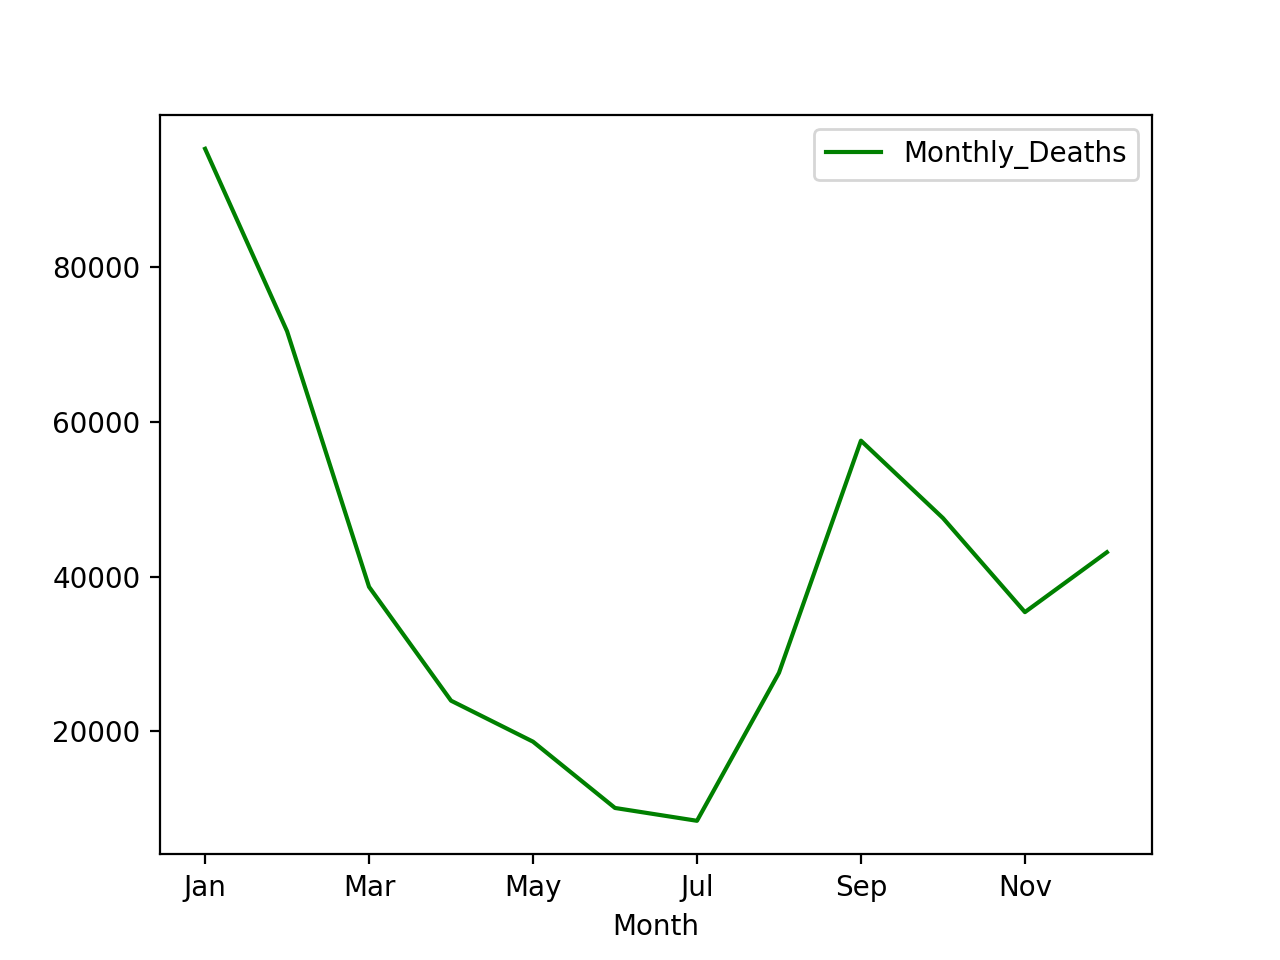

<AxesSubplot:xlabel='Month'>

In [70]:
death_df.plot.line(color='green')

<IPython.core.display.Javascript object>


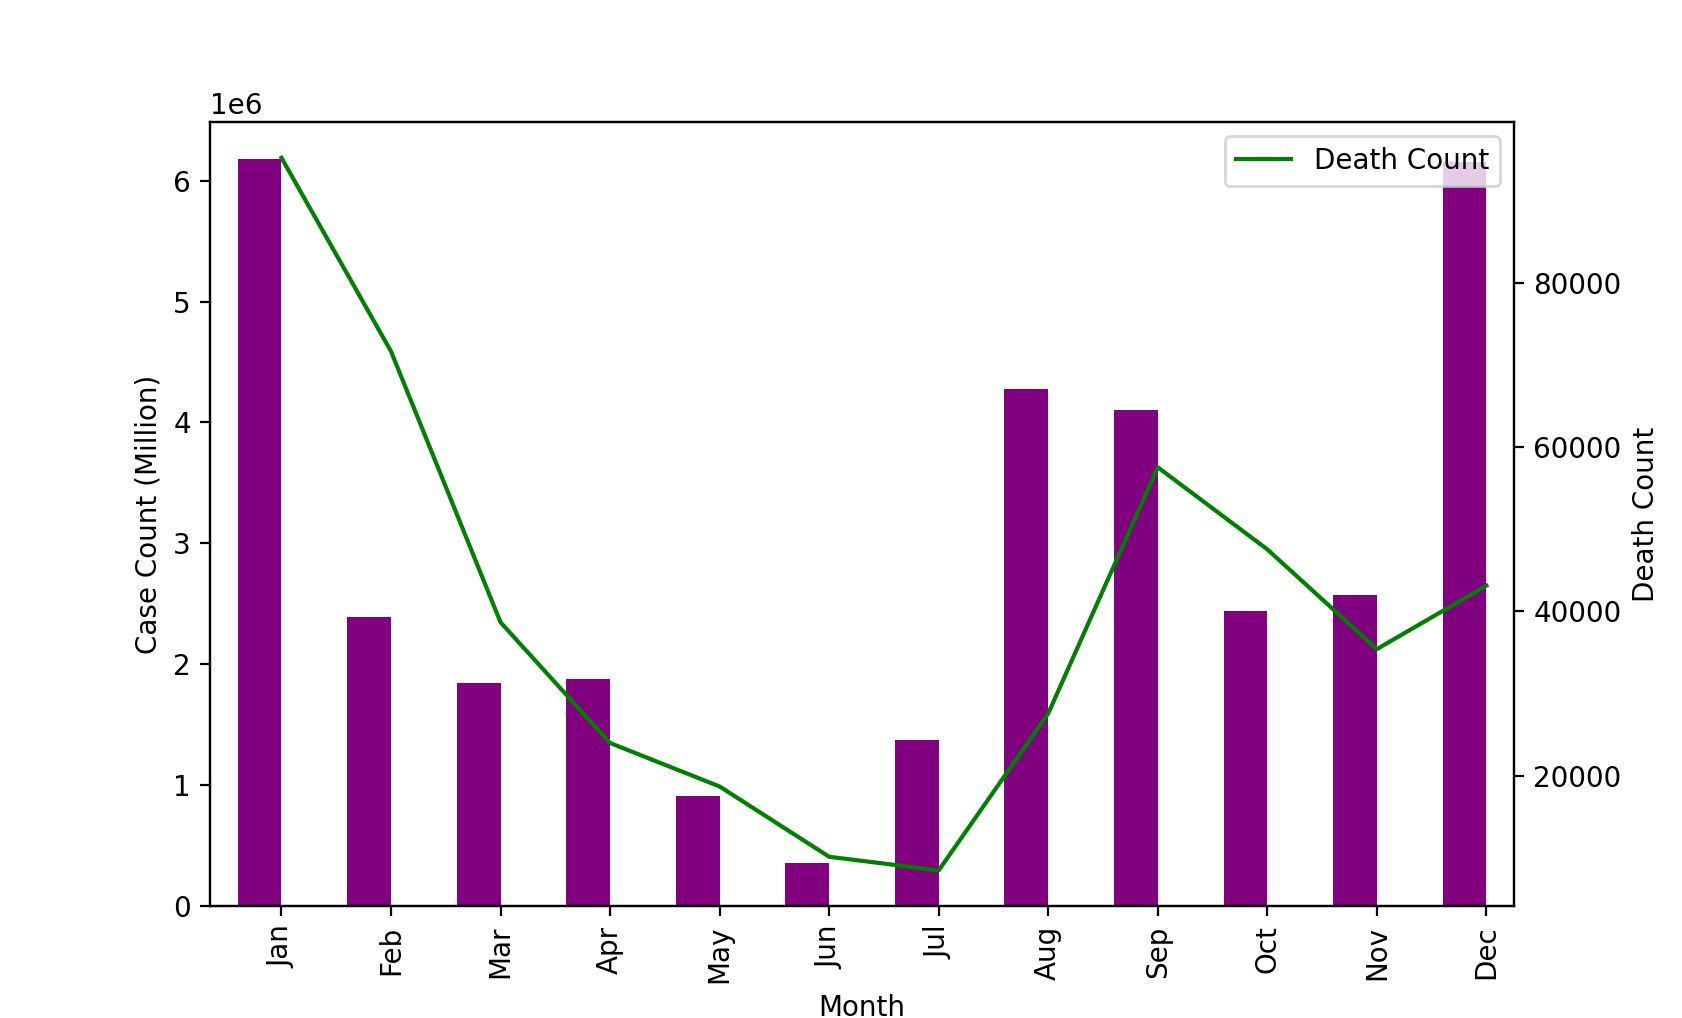

In [72]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.set_xlabel('Month')
ax1.set_ylabel('Case Count (Million)')
ax2.set_ylabel('Death Count')


width=0.4

#new_high_dead=new_high_dead.set_index('State')


df2['Monthly_cases'].plot(kind='bar',color='purple',ax=ax1,width=width,position=1, label= 'Case Count')
death_df['Monthly_Deaths'].plot(kind='line',color='green',ax=ax2, label='Death Count')

plt.legend()
plt.savefig("Images/combined_bar_line.png")
plt.show()